<font size='6'>This notebook is an educational exercise to convert the notebook of the Amazon dataset to use the imdb dataset</font>

<font size ='20'>Install nltk</font>

In [65]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<font size ='20'>Importing libraries</font>


In [66]:
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<font size ='20'>Reading dataset</font>

In [67]:
# Read train data
df1 = pd.read_csv('/content/drive/MyDrive/DATA/imdb_train.csv')

print('The shape of the original dataset is:', df1.shape)
#remove null recoreds
df1 = df1.dropna()
print('The shape of cleaned dataset is:', df1.shape)

X_train = df1["text"] 
y_train = df1["label"]

# Reads test data
df2 = pd.read_csv('/content/drive/MyDrive/DATA/imdb_test.csv')
# remove null records
df2 = df2.dropna()

X_test =df2["text"]
y_test = df2["label"]

print('The shape of test data', df2.shape)

The shape of the original dataset is: (4001, 2)
The shape of cleaned dataset is: (4000, 2)
The shape of test data (4492, 2)


<font size ='20'>Defineing stop words processor function</font>

In [68]:
# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')

# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# New stop word list
stop_words = [word for word in stop if word not in excluding]

snow = SnowballStemmer('english')

def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        
        # Check if the sentence is a missing value
        #if isinstance(sent, str) == False: sent = ""
            
        filtered_sentence=[]
        
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups

        for w in word_tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words
 
        final_text_list.append(final_string)
        
    return final_text_list


<font size ='10'>Calling stop word processor function</font>

In [69]:
print("Processing the text fields")
train_text_list = process_text(X_train.tolist())
val_text_list = process_text(X_test.tolist())

Processing the text fields


**Data processing with Pipeline and binary vectorizer**

Here we define a function to switch between two types of vectorizers and also take steps between a variable number of features.

In [70]:
def toggle_binary_vectorizer(bin=True, features = 10):
  pipeline = Pipeline([('text_vect', CountVectorizer(binary=bin, max_features=features)), ('knn', KNeighborsClassifier())])

  set_config(display='diagram')
  # We using lists of processed text fields 
  X_train = train_text_list
  X_val = val_text_list

  # Fit the Pipeline to training data
  pipeline.fit(X_train, y_train.values)
  # Use the fitted pipeline to make predictions on the validation dataset
  val_predictions = pipeline.predict(X_val)

  return accuracy_score(y_test.values, val_predictions)

Calling above function to loop in range 10 up to 100 features using binary an TF_IDF vectorizers

In [71]:
bin_accuracies    = []
TF_IDF_accuracies = []
features          = []

max_features = 100
min_features = 10
for f in range(min_features,max_features):
  b = toggle_binary_vectorizer(True,f)

  t = toggle_binary_vectorizer(False,f)

  bin_accuracies.append(b)

  TF_IDF_accuracies.append(t)

  features.append(f)

Printing accuracy table

In [73]:
import numpy as np
print('Table of accuracies')
data = {'Features':features,'Binary':bin_accuracies,'TF_IDF':TF_IDF_accuracies}
results = pd.DataFrame(data=data)
results


Table of accuracies


,Features,Binary,TF_IDF
0,10,0.519145,0.538513
1,11,0.516474,0.537845
2,12,0.527159,0.534728
3,13,0.520926,0.535174
4,14,0.519813,0.538736
...,...,...,...
85,95,0.628673,0.613758
86,96,0.616207,0.608415
87,97,0.612645,0.613758
88,98,0.619768,0.614426


Plotting accuracy data

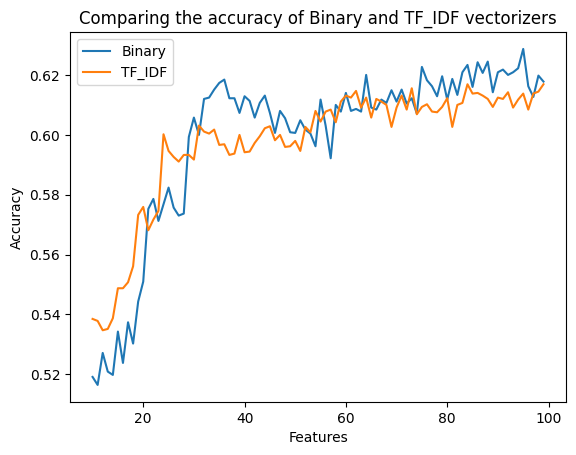

In [74]:
import matplotlib.pyplot as plt

# line 1 points
x1 = features
y1 = bin_accuracies
# plotting the line 1 points
plt.plot(x1, y1, label = "Binary")

# line 2 points
x2 = features
y2 = TF_IDF_accuracies
# plotting the line 2 points
plt.plot(x2, y2, label = "TF_IDF")

# naming the x axis
plt.xlabel('Features')
# naming the y axis
plt.ylabel('Accuracy')
# giving a title to my graph
plt.title('Comparing the accuracy of Binary and TF_IDF vectorizers')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
